# Dimensionality Reduction Techniques

<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Notebook Content</h3>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Principal-Component-Analysis-(PCA)" role="tab" aria-controls="settings">Principal Component Analysis (PCA)<span class="badge badge-primary badge-pill"></span></a> 
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Linear-Discriminant-Analysis-(LDA)" role="tab" aria-controls="settings">Linear Discriminant Analysis (LDA)<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Singular-Value-Decomposition-(SVD)" role="tab" aria-controls="settings">Singular Value Decomposition (SVD)<span class="badge badge-primary badge-pill"></span></a> 
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Partial-Least-Squares-Regression-(PLSR)" role="tab" aria-controls="settings">Partial Least Squares Regression (PLSR)<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#t-Distributed-Stochastic-Neighbor-Embedding-(t-SNE)" role="tab" aria-controls="settings">t-Distributed Stochastic Neighbor Embedding (t-SNE)<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Factor-Analysis" role="tab" aria-controls="settings">Factor Analysis<span class="badge badge-primary badge-pill"></span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#Isomap" role="tab" aria-controls="settings">Isomap<span class="badge badge-primary badge-pill"></span></a>
</div>

# Principal Component Analysis (PCA)

PCA, generally called **data reduction technique**, is very useful feature selection technique as it uses linear algebra to transform the dataset into a compressed form. We can implement PCA feature selection technique with the help of PCA class of scikit-learn Python library. We can select number of principal components in the output.

**The components are formed such that it explains the maximum variation in the dataset**.

In the example below, we will use PCA to select best 3 Principal components from Pima Indians Diabetes dataset.
PCA can be used were model interpritbilty is not concern. <br>Download link for diabetes dataset: https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
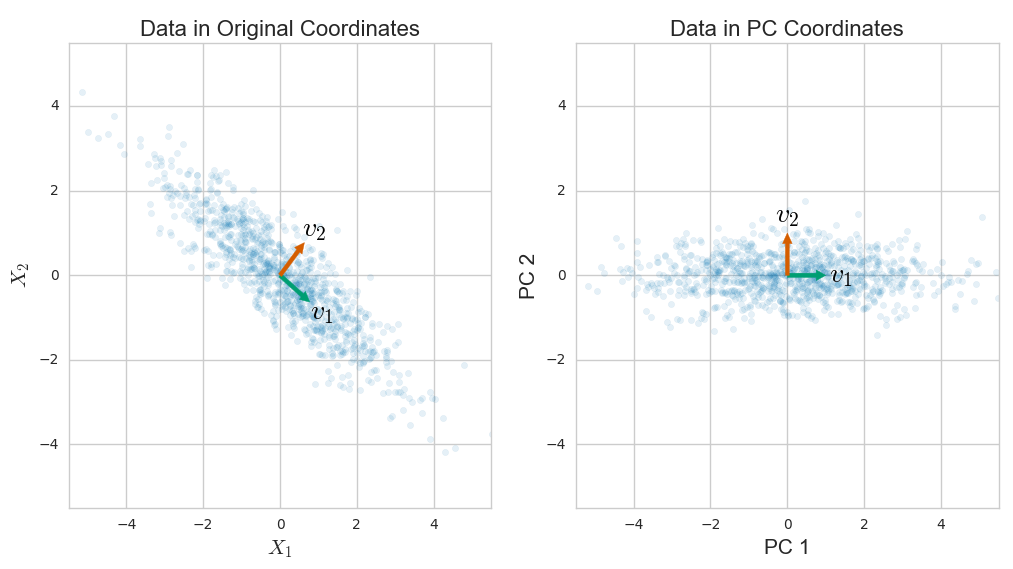
**The data along vector 1 shows a higher variance than vector 2. Therefore, vector 1 will be preferred and chosen as the first principle component. The axis has been rotated in the direction of highest variance. We have thus reduced the dimensionality from two (X1 and X2) to one (PC 1).**

In [5]:
dataframe = pd.read_csv('C:/Users/amit/Documents/ML Best Practices_Share point/Python/dataset/pima-indians-diabetes.csv')
array = dataframe.values

In [6]:
#Next, we will separate array into input and output components −
X = array[:,0:8]
Y = array[:,8]

In [7]:
#The following lines of code will extract features from dataset −
pca = PCA(n_components = 3)
fit = pca.fit(X)
print("Explained Variance: ", fit.explained_variance_ratio_)
print(fit.components_)
print(fit.n_features_)
print(fit.explained_variance_)

Explained Variance:  [0.88854663 0.06159078 0.02579012]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]
8
[13456.57298102   932.76013231   390.57783115]


PCA does not reak pick features foe further modeling, it reduces large numer of features to the number of components we want. <br>
PCA does not provide much interpretability

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Dimensionality-Reduction-Techniques" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

# Linear Discriminant Analysis (LDA)

LDA is a type of Linear combination, a mathematical process using various data items and applying a function to that site to separately analyze multiple classes of objects or items.

**In case of LDA, the transform method takes two parameters: the X_train and the y_train. However in the case of PCA, the transform method only requires one parameter i.e. X_train**. This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.

We have shown an example of LDA below:

In [5]:
dataframe = pd.read_csv('./dataset/pima-indians-diabetes.csv')
array = dataframe.values

In [6]:
#Next, we will separate array into input and output components −
X = array[:,0:8]
Y = array[:,8]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
X_test.shape

(154, 1)

• Here it can be seen that one component is passed, it is because LDA takes into consideration the number of classes in the dependent variables(output class labels), ie, the number of categories in y_train. <br>
• In the dataset the dependent is 'Class' which has either value '1', meaning a person has diabetes or '0' when the person does not have diabetes.<br> 
• For our description of LDA, the k−1 dimensions we keep would be the in-model space, whereas the remaining dimensions are the out-of-model space, k being the number of output class labels.<br>
• A visualization for how PCA and LDA works is given below:

Principal Component Analysis (**PCA**) applied to this data **identifies the
combination of attributes (principal components, or directions in the
feature space) that account for the most variance** in the data. Here we
plot the different samples on the 2 first principal components.

Linear Discriminant Analysis (**LDA**) tries to **identify attributes that
account for the most variance** between classes. In particular,
LDA, in contrast to PCA, is a supervised method, using known class labels.

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour
and Virginica) with 4 attributes: sepal length, sepal width, petal length
and petal width.

Automatically created module for IPython interactive environment
target names: ['setosa' 'versicolor' 'virginica']
explained variance ratio (first two components): [ 0.92461872  0.05306648]


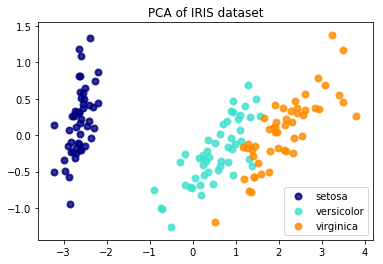

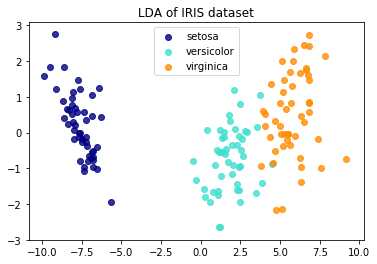

In [10]:
print(__doc__)

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
# print(X)
# print(y)
print("target names:" , target_names)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Dimensionality-Reduction-Techniques" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

# Singular Value Decomposition (SVD)

## Truncated SVD in scikit-learn

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

In [18]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)


Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3. 3.]
Transformed Matrix after reducing to 2 features:
[[-1.52116425 -1.63892017]
 [ 2.57516991 -1.16982903]
 [ 0.23357929  2.22383469]]


In [10]:
print("Explained_variance_ratio")
print(svd.explained_variance_ratio_)

Explained_variance_ratio
[0.48846154 0.51153846]


In [11]:
print("Explained_variance_ratio Sum")
print(svd.explained_variance_ratio_.sum())

Explained_variance_ratio Sum
1.0000000000000009


In [12]:
print("Singular Values")
print(svd.singular_values_)

Singular Values
[3. 3.]


## Randomized SVD in scikit-learn

Randomized SVD gives the same results as Truncated SVD and has a faster computation time. While Truncated SVD uses an exact solver ARPACK, Randomized SVD uses approximation techniques.

In [14]:
import numpy as np
from sklearn.utils.extmath import randomized_svd

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

Left Singular Vectors:
[[ 0.73786479  0.10540926]
 [-0.42163702  0.84327404]
 [-0.52704628 -0.52704628]]
Singular Values:
[[3. 0.]
 [0. 3.]]
Right Singular Vectors:
[[-0.52704628  0.84327404  0.10540926]
 [ 0.52704628  0.42163702 -0.73786479]]


In [15]:
print("Explained_variance_ratio")
print(svd.explained_variance_ratio_)

Explained_variance_ratio
[0.48078353 0.51921647]


In [16]:
print("Explained_variance_ratio Sum")
print(svd.explained_variance_ratio_.sum())

Explained_variance_ratio Sum
1.0


In [19]:
print("Singular Values")
print(svd.singular_values_)

Singular Values
[3. 3.]


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Dimensionality-Reduction-Techniques" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

# Partial Least Squares Regression (PLSR)

PLS is also a feature reduction method but it offers a supervised alternative to Principal Components Regression. 

The new set of features are also the linear combinations of the original regressors, but in computing them, the method makes use of the target variable.

As a result, the results of this technique not only explain the linear combinations of original features but the response variable as well. 

In [25]:
from sklearn.cross_decomposition import PLSRegression
X = [[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [2.,5.,4.]]
Y = [[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]
pls2 = PLSRegression(n_components=2)
pls2.fit(X, Y)

Y_pred = pls2.predict(X)

In [26]:
Y_pred

array([[ 0.05663121, -0.09051485],
       [ 0.73286275,  0.6068055 ],
       [ 6.66748337,  6.72650196],
       [11.64302267, 11.85720738]])

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Dimensionality-Reduction-Techniques" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a>

# t-Distributed Stochastic Neighbor Embedding (t-SNE)

It reduces the n numeric columns in the dataset to fewer dimensions m (m < n) based on nonlinear local relationships among the data points. 

It models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points in the new lower dimensional space


Computing PCA projection
Computing t-SNE embedding


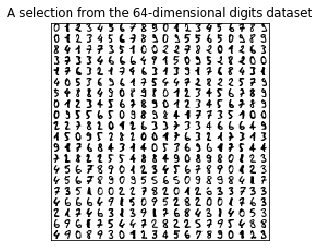

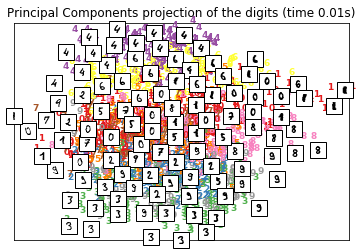

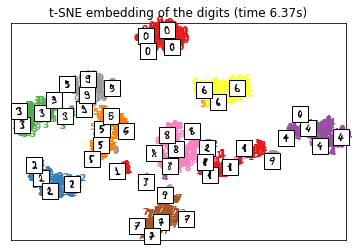

In [3]:
## importing the required packages
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
## Loading and curating the data
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#----------------------------------------------------------------------
## Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Dimensionality-Reduction-Techniques" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

# Factor Analysis

#### We are going to cover the following topics:

* Factor Analysis
* Types of Factor Analysis
* Determine Number of Factors
* Factor Analysis Vs. Principle Component Analysis
* Factor Analysis in python
* Adequacy Test
* Interpreting the results
* Pros and Cons of Factor Analysis
* Conclusion

In [5]:
df= pd.read_csv("./dataset/bfi.csv")
print(df.shape)
print(df.columns)

(2800, 28)
Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')


In [6]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
# Dropping missing values rows
df.dropna(inplace=True)

In [7]:
df.shape 
# df.info() # dtypes: float64(24), int64(1)

(2436, 25)

### Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
#### Bartlett’s Test: 

1. Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis

2. In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

#### Kaiser-Meyer-Olkin Test: 
* Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.966350869239, 0.0)

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print(kmo_model)

0.848539722195


The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.

#### Choosing the Number of Factors
For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [13]:
from factor_analyzer import FactorAnalyzer
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 5.13431118,  2.75188667,  2.14270195,  1.85232761,  1.54816285,
        1.07358247,  0.83953893,  0.79920618,  0.71898919,  0.68808879,
        0.67637336,  0.65179984,  0.62325295,  0.59656284,  0.56309083,
        0.54330533,  0.51451752,  0.49450315,  0.48263952,  0.448921  ,
        0.42336611,  0.40067145,  0.38780448,  0.38185679,  0.26253902])

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

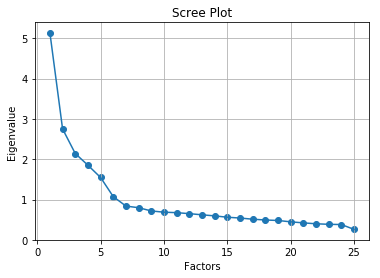

In [15]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [20]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(6,rotation="varimax")
fa.fit(df)
fa.loadings_

array([[  9.52197423e-02,   4.07831574e-02,   4.87338846e-02,
         -5.30987347e-01,  -1.13057329e-01,   1.61216352e-01],
       [  3.31312759e-02,   2.35538040e-01,   1.33714395e-01,
          6.61140974e-01,   6.37337872e-02,  -6.24353653e-03],
       [ -9.62088396e-03,   3.43008174e-01,   1.21353367e-01,
          6.05932695e-01,   3.39902652e-02,   1.60106427e-01],
       [ -8.15175585e-02,   2.19716721e-01,   2.35139532e-01,
          4.04594040e-01,  -1.25338020e-01,   8.63557031e-02],
       [ -1.49615885e-01,   4.14457674e-01,   1.06382165e-01,
          4.69698290e-01,   3.09765727e-02,   2.36519341e-01],
       [ -4.35840221e-03,   7.72477530e-02,   5.54582253e-01,
          7.51069635e-03,   1.90123729e-01,   9.50350455e-02],
       [  6.83300839e-02,   3.83703840e-02,   6.74545451e-01,
          5.70549873e-02,   8.75925914e-02,   1.52775080e-01],
       [ -3.99936733e-02,   3.18673008e-02,   5.51164438e-01,
          1.01282240e-01,  -1.13380869e-02,   8.99628361e-03],


* Factor 1 has high factor loadings for E1,E2,E3,E4, and E5 (Extraversion)
* Factor 2 has high factor loadings for N1,N2,N3,N4, and N5 (Neuroticism)
* Factor 3 has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)
* Factor 4 has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)
* Factor 5 has high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)
* Factor 6 has none of the high loagings for any variable and is not easily interpretable. Its good if we take only five factors.
#### Let's perform factor analysis for 5 factors.

In [21]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df)
fa.loadings_

array([[ 0.11112641,  0.04046493,  0.02279796, -0.42816554, -0.07793074],
       [ 0.029588  ,  0.21371606,  0.13903739,  0.62694553,  0.06213921],
       [ 0.00935691,  0.31784809,  0.10933115,  0.65074261,  0.05619584],
       [-0.06647574,  0.20456624,  0.23058374,  0.43562383, -0.1127004 ],
       [-0.12211317,  0.39303367,  0.08786921,  0.53708686,  0.0667076 ],
       [ 0.01041556,  0.07018423,  0.54582379,  0.03887794,  0.20958364],
       [ 0.08957412,  0.0332704 ,  0.64873118,  0.10278247,  0.11543389],
       [-0.03085502,  0.02390651,  0.55703585,  0.11157762, -0.00518271],
       [ 0.24041008, -0.0649837 , -0.63380555, -0.03749823, -0.107535  ],
       [ 0.29031777, -0.1763948 , -0.56246672, -0.04752477,  0.03682235],
       [ 0.04281888, -0.5748346 ,  0.03314352, -0.10481257, -0.05879528],
       [ 0.24474268, -0.67873071, -0.10248265, -0.11251716, -0.04200997],
       [ 0.02418041,  0.53681627,  0.08301031,  0.2579065 ,  0.28087733],
       [-0.11561383,  0.64683266,  0.1

In [22]:
# Get variance of each factors
fa.get_factor_variance()

(array([ 2.70963262,  2.47308982,  2.04110563,  1.84449799,  1.52215297]),
 array([ 0.1083853 ,  0.09892359,  0.08164423,  0.07377992,  0.06088612]),
 array([ 0.1083853 ,  0.2073089 ,  0.28895312,  0.36273304,  0.42361916]))

#### We see total 42% cumulative Variance explained by the 5 factors. The rows names written in the Image is to interpret the above data.
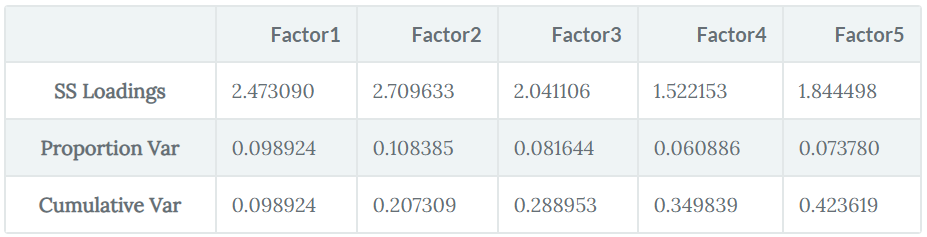

#### Pros and Cons of Factor Analysis
Factor analysis explores large dataset and finds interlinked associations. It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables, which help the market researchers to compress the market situations and find the hidden relationship among consumer taste, preference, and cultural influence. Also, It helps in improve questionnaire in for future surveys. Factors make for more natural data interpretation.

Results of factor analysis are controversial. Its interpretations can be debatable because more than one interpretation can be made of the same data factors. After factor identification and naming of factors requires domain knowledge.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Dimensionality-Reduction-Techniques" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 

# Isomap

Isomap (Isometric Feature Mapping), is a non-linear feature reduction method.Isomap should be used when there is a non-linear mapping between your higher-dimensional data and your lower-dimensional manifold.Isomap is better than linear methods when dealing with almost all types of real image and motion tracking and we will now look at the example that was used in the Tenenbaum et al. of images of faces in different poses and light conditions.


The images are 4096 dimensions (64 pixel x 64 pixel). We will reduce this down to just 2 dimensions

We start by loading our face data.

In [2]:
import math
import pandas as pd
import scipy.io
pd.options.display.max_columns = 7

mat = scipy.io.loadmat('C:/Users/amit/Documents/Phase-2/dataset/face_data.mat')
df = pd.DataFrame(mat['images']).T

num_images, num_pixels = df.shape
pixels_per_dimension = int(math.sqrt(num_pixels))

# Rotate the pictures
for idx in df.index:
    df.loc[idx] = df.loc[idx].values.reshape(pixels_per_dimension, pixels_per_dimension).T.reshape(-1)
    
# Show first 5 rows
print(df.head())

       0         1         2     ...   4093  4094  4095
0  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0
1  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0
2  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0
3  0.016176  0.110754  0.384988  ...    0.0   0.0   0.0
4  0.016176  0.000000  0.000000  ...    0.0   0.0   0.0

[5 rows x 4096 columns]


Now we fit our isomap to our data. Remember that if your data is not on the same scale, it may require scaling before this step.We will fit a manifold using 6 nearest neighbours and our aim is to reduce down to 2 components.

In [3]:
from sklearn import manifold

iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(df)
manifold_2Da = iso.transform(df)
manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])

# Left with 2 dimensions
manifold_2D.head()

,Component 1,Component 2
0,-26.169062,-0.578853
1,32.540561,-12.856883
2,-22.208342,6.490292
3,52.831644,-30.531746
4,-41.978740,8.017211


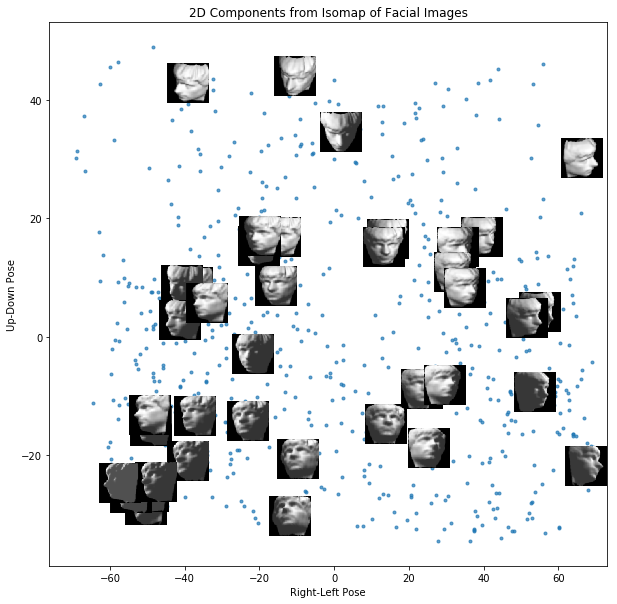

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(111)
ax.set_title('2D Components from Isomap of Facial Images')
ax.set_xlabel('Component: 1')
ax.set_ylabel('Component: 2')

# Show 40 of the images ont the plot
x_size = (max(manifold_2D['Component 1']) - min(manifold_2D['Component 1'])) * 0.08
y_size = (max(manifold_2D['Component 2']) - min(manifold_2D['Component 2'])) * 0.08
for i in range(40):
    img_num = np.random.randint(0, num_images)
    x0 = manifold_2D.loc[img_num, 'Component 1'] - (x_size / 2.)
    y0 = manifold_2D.loc[img_num, 'Component 2'] - (y_size / 2.)
    x1 = manifold_2D.loc[img_num, 'Component 1'] + (x_size / 2.)
    y1 = manifold_2D.loc[img_num, 'Component 2'] + (y_size / 2.)
    img = df.iloc[img_num,:].values.reshape(pixels_per_dimension, pixels_per_dimension)
    ax.imshow(img, aspect='auto', cmap=plt.cm.gray, 
              interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

# Show 2D components plot
ax.scatter(manifold_2D['Component 1'], manifold_2D['Component 2'], marker='.',alpha=0.7)

ax.set_ylabel('Up-Down Pose')
ax.set_xlabel('Right-Left Pose')

plt.show()

We have reduced the dimensions from 4096 dimensions (pixels) to just 2 dimensions.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Dimensionality-Reduction-Techniques" role="tab" aria-controls="settings">Go to top<span class="badge badge-primary badge-pill"></span></a> 